In [ ]:
# [Nur Colab] Diese Zellen müssen nur auf *Google Colab* ausgeführt werden und installieren Packete und Daten
!wget -q https://raw.githubusercontent.com/KI-Campus/AMALEA/master/requirements.txt && pip install --quiet -r requirements.txt
!wget --quiet "https://github.com/KI-Campus/AMALEA/releases/download/data/data.zip" && unzip -q data.zip
!wget --quiet "https://github.com/KI-Campus/AMALEA/releases/download/images/images.zip" && unzip -q images.zip

# Falten, Ausschneiden und fertig ist das CNN

## Convolutional Neural Networks (CNNs)

### Grundlagen

Neuronale Netze können auf verschiedene Daten angewendet werden, wobei sich für visuelle Informationen Convolutional Neural Networks (CNNs) als effizienter und effektiver erwiesen haben. Tatsächlich schneiden diese Modelle besser ab als reguläre Strukturen mit mehreren Hidden Layers, sofern die betrachteten Daten räumliche Abhängigkeiten enthalten.
Diese Voraussetzung ist in Bildern als Pixelwerte gegeben, die sich räumlich aufeinander beziehen. Inspiriert von Filtern, die in der Ära der harten Featureextraktion in der Computer Vision verwendet wurden, passen diese Netze ihre Gewichte in Form von `lernbaren Filtern` an, um das Bild in höhere räumliche Dimensionen zu projizieren. Features sind definiert als eine Charakteristik der zu beobachteten Daten, beginnend in den ersten Faltungsschichten (engl. convolutional layers), indem sie die Kanten eines Bildes oder eine `niedrigere semantische` Repräsentation darstellen. Durch das weitere Durchlaufen eines CNN, werden diese in gröbere "abstrakte Attribute" umgewandelt, die es dem Netzwerk ermöglichen, einzelne oder mehrere Objekte in einem Bild zu unterscheiden oder zu klassifizieren. Als Beispiel wird unten die Klassifizierung eines Autos gezeigt. Beachten Sie, dass `CONV` eine Faltungsoperation ist, `RELU` sich auf die gleichgerichtete lineare Einheit bezieht und `POOL` eine Pooling-Schicht zur Reduzierung der Bilddimensionen beschreibt. Diese Operationen werden in Kürze erklärt.

!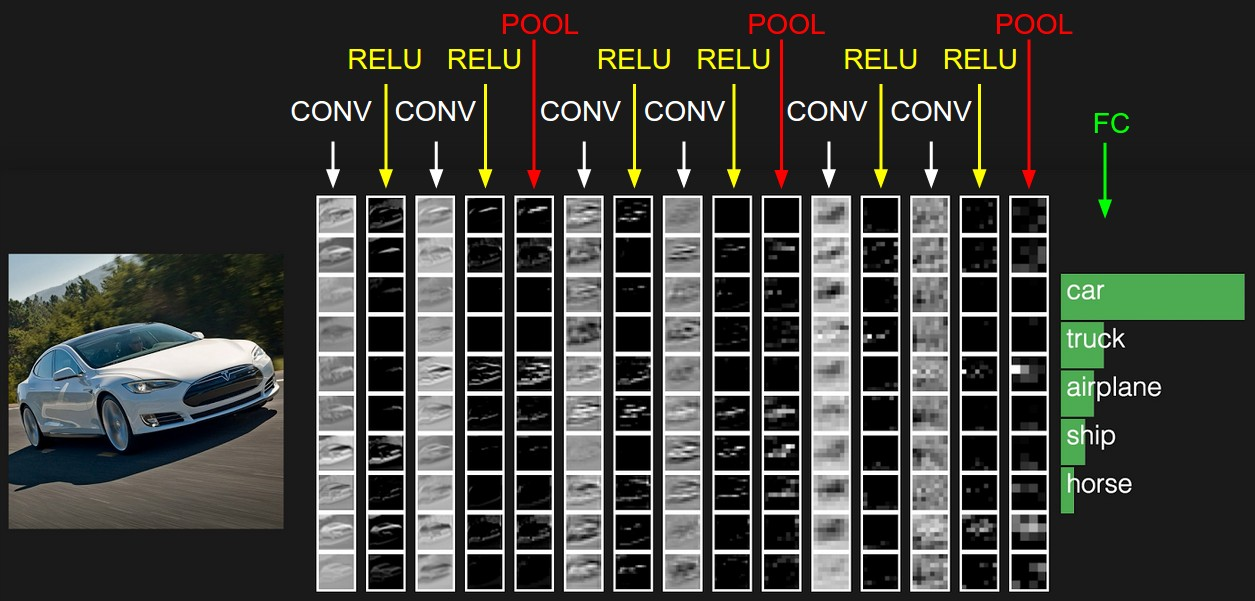[CNN feedforward](images/stanford_cnn.jpg "CNN_feedforward")


                                    Quelle: http://cs231n.github.io/convolutional-networks/

In der Computer Vision oder Bildverarbeitung gibt es gängige Filtermatrizen, die verwendet werden, um Informationen aus einem Bild zu extrahieren oder die Darstellung der Features zu verändern. Lernbare Filter in der Faltungsschicht (engl. convolutional layer) verändern ebenfalls die Darstellung eines Bildes. Diese werden später im Abschnitt über die Faltungsschichten besprochen.

Im Moment konzentrieren wir uns auf die bekannten (nicht erlernbaren) Bildfilter. Um die Auswirkungen dieser Filter zu verdeutlichen, werden wir sie auf ein Beispielbild anwenden:

### Importe

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import figure
import numpy as np
from scipy import misc, signal

In [ ]:
#Load Ascent image from scipy
ascent = misc.ascent()

figure_inches = 10
fig, ax = plt.subplots(figsize=(figure_inches, figure_inches))
ax.set_title('Original-Bild', fontsize = 15)
ax.imshow(ascent, interpolation='nearest', cmap='gray')
plt.tight_layout()

#### Mean-Filter

Der erste Filter, den wir anwenden werden, heißt "Mean-Filter". Der Mean-Filter ersetzt einen Pixelwert durch den Mittelwert der Werte, die sich in der Nachbarschaft des Pixels $9\times 9$ befinden. Das heißt, wir verwenden alle benachbarten Pixel sowie die Werte des zu ersetzenden Pixels, dann berechnen wir den Mittelwert dieser neun Werte und verwenden das Ergebnis als neuen Pixelwert.

In [ ]:
# Some 3x3 filter matrices used in computer vision

# Mean-filter
mean = 1/9 * np.ones([9,9])

# Approximation of the gradient
prewitt_x =  np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewitt_y =  np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

sobel_x =  np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y =  np.array([[-1, -2, 1], [0, 0, 0], [1, 2, 1]])

# Second-order derivation
laplace_var = np.array([[0, 1, 0], [1, -4, 1],[0, 1, 0]])

In [ ]:
ascent_mean = signal.convolve2d(ascent, mean, boundary='symm', mode='same')
fig, ax = plt.subplots(figsize=(figure_inches, figure_inches))
ax.set_title('Ergebnis nach Anwendung des Mean-Filters', fontsize = 15)
ax.imshow(ascent_mean, interpolation='nearest', cmap='gray')
plt.tight_layout()

Wie Sie sehen können, wird dadurch das Bild unscharf.

#### Prewitt-Filter

Das Ziel des Prewitt-Filters ist, den Pixel-Wert durch seine Ableitung, d.h. die Änderung im Farbwert, zu ersetzen. Auch hier kommt eine $9\times 9$-Nachbarschaft zum Einsatz. Da Bilder i.d.R. 2-dimensional sind (x- und y-Achse), kann die Ableitung sowohl der einen als auch der anderen Dimension berechnet werden. Praktisch bedeutet dies, dass es zwei Prewitt-Filter gibt, einen in x- und einen in y-Richtung. Außerdem korrespondieren größere Änderungen im Pixelwert (d.h. der Wert der Ableitung ist größer) mit Kanten im Bild, weshalb die Prewitt-Filter auch als Kantendetektoren bezeichnet werden.

In [ ]:
ascent_x_prew = signal.convolve2d(ascent, prewitt_x, boundary='symm', mode='same')
ascent_x_prew = np.absolute(ascent_x_prew)
fig, ax = plt.subplots(figsize=(figure_inches, figure_inches))
ax.set_title('Ergebnis nach Anwendung des Prewitt-Filters in x-Richtung', fontsize = 15)
ax.imshow(ascent_x_prew, interpolation='nearest', cmap='gray')
plt.tight_layout()

In [ ]:
ascent_y_prew = signal.convolve2d(ascent, prewitt_y, boundary='symm', mode='same')
ascent_y_prew = np.absolute(ascent_y_prew)
fig, ax = plt.subplots(figsize=(figure_inches, figure_inches))
ax.set_title('Ergebnis nach Anwendung des Prewitt-Filters in y-Richtung', fontsize = 15)
ax.imshow(ascent_y_prew, interpolation='nearest', cmap='gray')
plt.tight_layout()

Auf den beiden Bildern sieht man, dass die entsprechenden Kanten in entweder x- oder y-Richtung extrahiert wurden. In der praktischen Anwendung, möchte man aber meist alle Kanten extrahieren - unabhängig von der Richtung. In diesem Fall werden schlichtweg die beiden Bilder addiert und anschließend durch 2 geteilt. Das Teilen durch 2 ist notwendig, damit die Pixelwert im Bereich 0 bis 255 verbleiben.

In [ ]:
x_y_prew = (ascent_y_prew + ascent_x_prew) / 2

fig, ax = plt.subplots(figsize=(figure_inches, figure_inches))
ax.set_title('Ergebnis nach Anwendung des Prewitt-Filters in x- & y-Richtung', fontsize = 15)
ax.imshow(x_y_prew, interpolation='nearest', cmap='gray')
plt.tight_layout()

<div class="alert alert-block alert-success">
<b>Frage 5.1.1:</b> Welcher lineare Prewitt-Filter wird benötigt, um horizontale Kanten hervorzuheben?
</div>

<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


### Gesichtserkennung

Im folgenden wird die im Video erwähnte Gesichtserkennung skizziert.

Zu Beginn erstmal ein Bild mit Gesichtern:

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open('images/Gesichter.jpg')

plt.figure(figsize=(15,10))
plt.imshow(img)
plt.show()


Nun kann mithilfe einer Gesichtserkennung, die ensprechenden Bounding Boxen extrahiert werden.

In [ ]:
img = Image.open('images/Gesichtserkennung_1_Bounding_Boxes.png')

plt.figure(figsize=(15,10))
plt.imshow(img)
plt.show()

Und abschließend die Landmarks:

In [ ]:
img = Image.open('images/Gesichtserkennung_2_Landmarks.png')

plt.figure(figsize=(15,10))
plt.imshow(img)
plt.show()

Nun können die Gesichter extrahiert werden

In [ ]:
import os

path = './images/landmarks/face/'
for file in os.listdir(path):
    if ".png" in file:
        img = Image.open(os.path.join(path, file))
        plt.figure()
        plt.imshow(img)
        plt.show()

Nun können die Landmarken extrahiert werden:

In [ ]:
import os

path = './images/landmarks/landmarks/'
for file in os.listdir(path):
    if ".png" in file:
        img = Image.open(os.path.join(path, file))
        plt.figure()
        plt.imshow(img)
        plt.show()

Und zuletzt werden die Gesichter transformiert, sodass alle gleich große (96x96 Pixel) sind und mittig liegen. Somit können die Landmarken (z.B. Augen) immer an der gleichen Stelle im Bild auftauchen.

In [ ]:
import os

path = './images/landmarks/transformed/'
for file in os.listdir(path):
    if ".png" in file:
        img = Image.open(os.path.join(path, file))
        plt.figure()
        plt.imshow(img)
        plt.show()
